In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/jeromeroche/Documents/NUS/Thesis/TP/Continuous_Env/src'

In [3]:
os.chdir('../')

In [4]:
os.chdir('log_files/wind_map_1/png_continuous_7_1_10_1_propulsion_15_4_0.9_150000/')

In [5]:
seed = 2
os.chdir('seed_'+str(seed))
file = open('MonteCarlo.txt', 'r')
data = []
for line in file:
    data.append(float(line))

In [6]:
MonteCarlo = [data[0]]
for i in range(1, len(data)):
    MonteCarlo.append(MonteCarlo[i-1] + data[i])
for i in range(len(MonteCarlo)):
    MonteCarlo[i] /= i+1

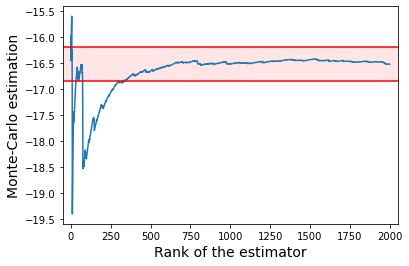

In [7]:
plt.plot(MonteCarlo)
plt.axhline(MonteCarlo[-1] * 1.02, color = 'red')
plt.axhline(MonteCarlo[-1] * 0.98, color = 'red')
plt.fill_between([i - 500 for i in range(3000)], [MonteCarlo[-1] * 0.98 for _ in range(3000)], [MonteCarlo[-1] * 1.02 for _ in range(3000)], color = 'red', alpha = .1)
plt.xlabel('Rank of the estimator', fontsize=14)
plt.xlim(-50, 2050)
plt.ylabel('Monte-Carlo estimation', fontsize=14)
plt.savefig('MonteCarlo_plot.png')

In [44]:
error = 0.01
for i in range(1, len(MonteCarlo)):
    if MonteCarlo[-i] < MonteCarlo[-1] - abs(error*MonteCarlo[-1]) or MonteCarlo[-i] > MonteCarlo[-1] + abs(error*MonteCarlo[-1]):
        break   
print(2000 - i + 1)

430


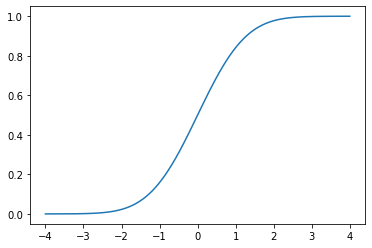

In [9]:
import scipy.stats as ss

#define x and y values to use for CDF
x = np.linspace(-4, 4, 1000)
y = ss.norm.cdf(x)

#plot normal CDF
plt.plot(x, y)